In [1]:
import math
import sys
sys.path.append('../../../')
from pprint import pprint
import time
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pickle
seed = 42
np.random.seed(seed)

In [2]:
# analyticalResult = sin^2(θ)
# θ = arcsin(sqrt(analyticalResult))
b_max = math.pi / 500  # upper limit of integral # 5
nbit = 20  # change this value to get discretized result closer to analytical results # 3

analyticResult = (b_max / 2.0 - math.sin(2 * b_max) / 4.0 ) / b_max  # the target integral can be analytically solved
print("Analytical Result:", analyticResult)

ndiv = 2 ** nbit  #number of discretization 
discretizedResult = 0.0
for i in range(ndiv):
    discretizedResult += math.sin(b_max / ndiv * (i + 0.5)) ** 2
discretizedResult = discretizedResult / ndiv
print("Discretized Result:", discretizedResult)

print("theoretical theta: ", np.arcsin(np.sqrt(analyticResult)))

Analytical Result: 1.315936863217701e-05
Discretized Result: 1.3159368632142957e-05
theoretical theta:  0.0036275923634797222


In [3]:
from qiskit import QuantumRegister
from qiskit import execute
from qiskit import Aer
from scipy import optimize
from lib_grover import *

In [4]:
#setting the number of shots and Grover operators.
max_iter = 10
number_grover_list = [1, 2, 4, 8, 16, 32, 64]  # list of number of Grover operators
shots = 100
shots_list = [shots] * len(number_grover_list) # list of number of shots
if len(shots_list) != len(number_grover_list):
    raise Exception('The length of shots_list should be equal to the length eof number_grover_list.')

backend = Aer.get_backend('qasm_simulator')

In [5]:
with open("pkls/ignis_info_list_list.pkl", "rb") as f:
    ignis_info_list_list = pickle.load(f)
with open("pkls/lnp_info_list_list.pkl", "rb") as f:
    lnp_info_list_list = pickle.load(f)
with open("pkls/delta_info_list_list.pkl", "rb") as f:
    delta_info_list_list = pickle.load(f)
with open("pkls/mooney01_info_list_list.pkl", "rb") as f:
    mooney01_info_list_list = pickle.load(f)
with open("pkls/mooney001_info_list_list.pkl", "rb") as f:
    mooney001_info_list_list = pickle.load(f)
with open("pkls/nation_lu_info_list_list.pkl", "rb") as f:
    nation_lu_info_list_list = pickle.load(f)
with open("pkls/nation_bicgstab_info_list_list.pkl", "rb") as f:
    nation_bicgstab_info_list_list = pickle.load(f)
with open("pkls/mthree_lu_info_list_list.pkl", "rb") as f:
    mthree_lu_info_list_list = pickle.load(f)
with open("pkls/mthree_gmres_info_list_list.pkl", "rb") as f:
    mthree_gmres_info_list_list = pickle.load(f)

In [6]:
with open("pkls/raw_hit_list_list.pkl", "rb") as f:
    raw_hit_list_list = pickle.load(f)
with open("pkls/ignis_hit_list_list.pkl", "rb") as f:
    ignis_hit_list_list = pickle.load(f)
with open("pkls/lnp_hit_list_list.pkl", "rb") as f:
    lnp_hit_list_list = pickle.load(f)
with open("pkls/delta_hit_list_list.pkl", "rb") as f:
    delta_hit_list_list = pickle.load(f)
with open("pkls/mooney01_hit_list_list.pkl", "rb") as f:
    mooney01_hit_list_list = pickle.load(f)
with open("pkls/mooney001_hit_list_list.pkl", "rb") as f:
    mooney001_hit_list_list = pickle.load(f)
with open("pkls/nation_lu_hit_list_list.pkl", "rb") as f:
    nation_lu_hit_list_list = pickle.load(f)
with open("pkls/nation_bicgstab_hit_list_list.pkl", "rb") as f:
    nation_bicgstab_hit_list_list = pickle.load(f)
with open("pkls/mthree_lu_hit_list_list.pkl", "rb") as f:
    mthree_lu_hit_list_list = pickle.load(f)
with open("pkls/mthree_gmres_hit_list_list.pkl", "rb") as f:
    mthree_gmres_hit_list_list = pickle.load(f)

In [7]:
mean_raw_hit_list = np.mean(np.asarray(raw_hit_list_list), axis=0)
stddev_raw_hit_list = np.std(np.asarray(raw_hit_list_list), axis=0)
mean_ignis_hit_list = np.mean(np.asarray(ignis_hit_list_list), axis=0)
stddev_ignis_hit_list = np.std(np.asarray(ignis_hit_list_list), axis=0)
mean_delta_hit_list = np.mean(np.asarray(delta_hit_list_list), axis=0)
stddev_delta_hit_list = np.std(np.asarray(delta_hit_list_list), axis=0)
mean_lnp_hit_list = np.mean(np.asarray(lnp_hit_list_list), axis=0)
stddev_lnp_hit_list = np.std(np.asarray(lnp_hit_list_list), axis=0)
mean_mooney01_hit_list = np.mean(np.asarray(mooney01_hit_list_list), axis=0)
stddev_mooney01_hit_list = np.std(np.asarray(mooney01_hit_list_list), axis=0)
mean_mooney001_hit_list = np.mean(np.asarray(mooney001_hit_list_list), axis=0)
stddev_mooney001_hit_list = np.std(np.asarray(mooney001_hit_list_list), axis=0)
mean_nation_lu_hit_list = np.mean(np.asarray(nation_lu_hit_list_list), axis=0)
stddev_nation_lu_hit_list = np.std(np.asarray(nation_lu_hit_list_list), axis=0)
mean_nation_bicgstab_hit_list = np.mean(np.asarray(nation_bicgstab_hit_list_list), axis=0)
stddev_nation_bicgstab_hit_list = np.std(np.asarray(nation_bicgstab_hit_list_list), axis=0)
mean_mthree_lu_hit_list = np.mean(np.asarray(mthree_lu_hit_list_list) * shots, axis=0)
stddev_mthree_lu_hit_list = np.std(np.asarray(mthree_lu_hit_list_list) * shots, axis=0)
mean_mthree_gmres_hit_list = np.mean(np.asarray(mthree_gmres_hit_list_list) * shots, axis=0)
stddev_mthree_gmres_hit_list = np.std(np.asarray(mthree_gmres_hit_list_list) * shots, axis=0)

Text(0, 0.5, 'number of shots for $|00...0\\rangle$')

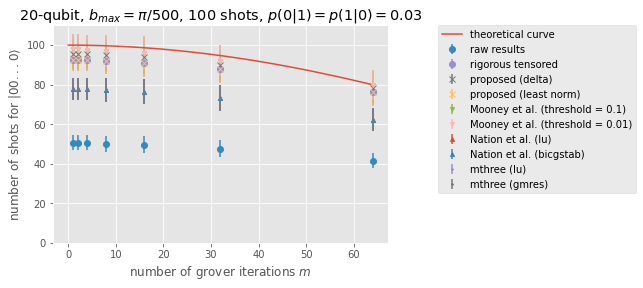

In [38]:
divide = 100
plt.plot(np.linspace(0,number_grover_list[-1], divide), 
         shots * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arcsin(np.sqrt(discretizedResult))) ** 2, 
         label="theoretical curve", color="C0")
plt.errorbar(number_grover_list, mean_raw_hit_list, stddev_raw_hit_list, linestyle='None', marker="o", label="raw results", color="C1", markersize=6)
plt.errorbar(number_grover_list, mean_ignis_hit_list, stddev_ignis_hit_list, linestyle='None', marker="o", label="rigorous tensored", color="C2", markersize=6)
plt.errorbar(number_grover_list, mean_delta_hit_list, stddev_delta_hit_list, linestyle='None',  marker="x", label="proposed (delta)", color="C3", markersize=6)
plt.errorbar(number_grover_list, mean_lnp_hit_list, stddev_lnp_hit_list, linestyle='None',  marker="x", label="proposed (least norm)", color="C4", markersize=6)
plt.errorbar(number_grover_list, mean_mooney01_hit_list, stddev_mooney01_hit_list, linestyle='None',  marker="v", label="Mooney et al. (threshold = 0.1)", color="C5", markersize=4)
plt.errorbar(number_grover_list, mean_mooney001_hit_list, stddev_mooney001_hit_list, linestyle='None', marker="v", label="Mooney et al. (threshold = 0.01)", color="C6", markersize=4)
plt.errorbar(number_grover_list, mean_nation_lu_hit_list, stddev_nation_lu_hit_list, linestyle='None', marker="^", label="Nation et al. (lu)", color="C7", markersize=4)
plt.errorbar(number_grover_list, mean_nation_bicgstab_hit_list, stddev_nation_bicgstab_hit_list, linestyle='None', marker="^", label="Nation et al. (bicgstab)", color="C8", markersize=4)
plt.errorbar(number_grover_list, mean_mthree_lu_hit_list, stddev_mthree_lu_hit_list, linestyle='None', marker="*", label="mthree (lu)", color="C9", markersize=2)
plt.errorbar(number_grover_list, mean_mthree_gmres_hit_list, stddev_mthree_gmres_hit_list, linestyle='None', marker="*", label="mthree (gmres)", color="C10", markersize=2)
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0)
plt.ylim(0, 110)
plt.title(r"20-qubit, $b_{max}=\pi/500$, 100 shots, $p(0|1)=p(1|0)=0.03$")
plt.xlabel(r"number of grover iterations $m$")
plt.ylabel(r"number of shots for $|00...0\rangle$")

Text(0, 0.5, 'number of shots for $|00...0\\rangle$')

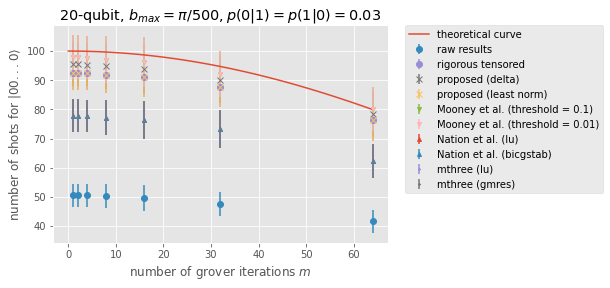

In [9]:
divide = 100
plt.plot(np.linspace(0,number_grover_list[-1], divide), 
         shots * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arcsin(np.sqrt(discretizedResult))) ** 2, 
         label="theoretical curve", color="C0")
plt.errorbar(number_grover_list, mean_raw_hit_list, stddev_raw_hit_list, linestyle='None', marker="o", label="raw results", color="C1", markersize=6)
plt.errorbar(number_grover_list, mean_ignis_hit_list, stddev_ignis_hit_list, linestyle='None', marker="o", label="rigorous tensored", color="C2", markersize=6)
plt.errorbar(number_grover_list, mean_delta_hit_list, stddev_delta_hit_list, linestyle='None',  marker="x", label="proposed (delta)", color="C3", markersize=6)
plt.errorbar(number_grover_list, mean_lnp_hit_list, stddev_lnp_hit_list, linestyle='None',  marker="x", label="proposed (least norm)", color="C4", markersize=6)
plt.errorbar(number_grover_list, mean_mooney01_hit_list, stddev_mooney01_hit_list, linestyle='None',  marker="v", label="Mooney et al. (threshold = 0.1)", color="C5", markersize=4)
plt.errorbar(number_grover_list, mean_mooney001_hit_list, stddev_mooney001_hit_list, linestyle='None', marker="v", label="Mooney et al. (threshold = 0.01)", color="C6", markersize=4)
plt.errorbar(number_grover_list, mean_nation_lu_hit_list, stddev_nation_lu_hit_list, linestyle='None', marker="^", label="Nation et al. (lu)", color="C7", markersize=4)
plt.errorbar(number_grover_list, mean_nation_bicgstab_hit_list, stddev_nation_bicgstab_hit_list, linestyle='None', marker="^", label="Nation et al. (bicgstab)", color="C8", markersize=4)
plt.errorbar(number_grover_list, mean_mthree_lu_hit_list, stddev_mthree_lu_hit_list, linestyle='None', marker="*", label="mthree (lu)", color="C9", markersize=2)
plt.errorbar(number_grover_list, mean_mthree_gmres_hit_list, stddev_mthree_gmres_hit_list, linestyle='None', marker="*", label="mthree (gmres)", color="C10", markersize=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title(r"20-qubit, $b_{max}=\pi/500, p(0|1)=p(1|0)=0.03$")
plt.xlabel(r"number of grover iterations $m$")
plt.ylabel(r"number of shots for $|00...0\rangle$")

Text(0, 0.5, 'number of shots for $|00...0\\rangle$')

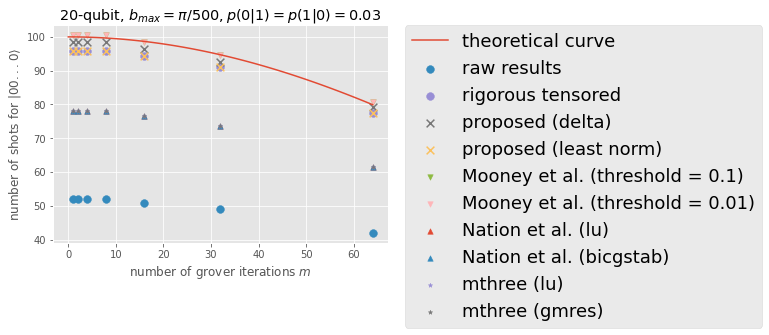

In [10]:
divide = 100
plt.plot(np.linspace(0,number_grover_list[-1], divide), 
         shots * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arcsin(np.sqrt(discretizedResult))) ** 2, 
         label="theoretical curve", color="C0")
plt.scatter(number_grover_list, raw_hit_list_list[-1], marker="o", label="raw results", color="C1", s=60)
plt.scatter(number_grover_list, ignis_hit_list_list[-1], marker="o", label="rigorous tensored", color="C2", s=60)
plt.scatter(number_grover_list, delta_hit_list_list[-1], marker="x", label="proposed (delta)", color="C3", s=60)
plt.scatter(number_grover_list, lnp_hit_list_list[-1], marker="x", label="proposed (least norm)", color="C4", s=60)
plt.scatter(number_grover_list, mooney01_hit_list_list[-1], marker="v", label="Mooney et al. (threshold = 0.1)", color="C5", s=30)
plt.scatter(number_grover_list, mooney001_hit_list_list[-1], marker="v", label="Mooney et al. (threshold = 0.01)", color="C6", s=30)
plt.scatter(number_grover_list, np.asarray(nation_lu_hit_list_list[-1]), marker="^", label="Nation et al. (lu)", color="C7", s=30)
plt.scatter(number_grover_list, np.asarray(nation_bicgstab_hit_list_list[-1]), marker="^", label="Nation et al. (bicgstab)", color="C8", s=30)
plt.scatter(number_grover_list, np.asarray(mthree_lu_hit_list_list[-1]) * shots, marker="*", label="mthree (lu)", color="C9", s=20)
plt.scatter(number_grover_list, np.asarray(mthree_gmres_hit_list_list[-1]) * shots, marker="*", label="mthree (gmres)", color="C10", s=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.title(r"20-qubit, $b_{max}=\pi/500, p(0|1)=p(1|0)=0.03$")
plt.xlabel(r"number of grover iterations $m$")
plt.ylabel(r"number of shots for $|00...0\rangle$")

In [11]:
thetaCandidate_raw_list_list = []
for iter_count, raw_hit_list in enumerate(raw_hit_list_list):
    thetaCandidate_raw_list_list.append( calculate_theta(raw_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished


In [12]:
thetaCandidate_ignis_list_list = []
for iter_count, ignis_hit_list in enumerate(ignis_hit_list_list):
    thetaCandidate_ignis_list_list.append( calculate_theta(ignis_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished


In [13]:
thetaCandidate_delta_list_list = []
for iter_count, delta_hit_list in enumerate(delta_hit_list_list):
    thetaCandidate_delta_list_list.append( calculate_theta(delta_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

iter 1 finished
iter 2 finished


/Users/yangbo/Documents/projects/master_thesis/test_libs_qrem/modified_grover/n20_piover500/p003_q003/grover100_cal8192/../../../lib_grover.py:224: RuntimeWarning: invalid value encountered in sqrt
  theta = np.arcsin(np.sqrt(p))
/Users/yangbo/Documents/projects/master_thesis/test_libs_qrem/modified_grover/n20_piover500/p003_q003/grover100_cal8192/../../../lib_grover.py:229: RuntimeWarning: divide by zero encountered in log
  + 2 * (shots_list[n] - ihit) * np.log(np.abs(np.sin(arg)))
/Users/yangbo/Documents/projects/master_thesis/test_libs_qrem/modified_grover/n20_piover500/p003_q003/grover100_cal8192/../../../lib_grover.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  FisherInfo += Nk / (p0 * (1 - p0)) * (2 * mk)**2
/Users/yangbo/Documents/projects/master_thesis/test_libs_qrem/modified_grover/n20_piover500/p003_q003/grover100_cal8192/../../../lib_grover.py:228: RuntimeWarning: invalid value encountered in add
  ret = ret + 2 * ihit * np.log(np.abs(np.cos(arg))) \

iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished


In [14]:
thetaCandidate_lnp_list_list = []
for iter_count, lnp_hit_list in enumerate(lnp_hit_list_list):
    thetaCandidate_lnp_list_list.append( calculate_theta(lnp_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished


In [15]:
thetaCandidate_mooney01_list_list = []
for iter_count, mooney01_hit_list in enumerate(mooney01_hit_list_list):
    thetaCandidate_mooney01_list_list.append( calculate_theta(mooney01_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished


In [16]:
thetaCandidate_mooney001_list_list = []
for iter_count, mooney001_hit_list in enumerate(mooney001_hit_list_list):
    thetaCandidate_mooney001_list_list.append( calculate_theta(mooney001_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished


In [17]:
thetaCandidate_nation_lu_list_list = []
for iter_count, nation_lu_hit_list in enumerate(nation_lu_hit_list_list):
    thetaCandidate_nation_lu_list_list.append( calculate_theta(nation_lu_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished


In [18]:
thetaCandidate_nation_bicgstab_list_list = []
for iter_count, nation_bicgstab_hit_list in enumerate(nation_bicgstab_hit_list_list):
    thetaCandidate_nation_bicgstab_list_list.append( calculate_theta(nation_bicgstab_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished


In [19]:
thetaCandidate_mthree_lu_list_list = []
for iter_count, mthree_lu_hit_list in enumerate(mthree_lu_hit_list_list):
    thetaCandidate_mthree_lu_list_list.append( calculate_theta(mthree_lu_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished


In [20]:
thetaCandidate_mthree_gmres_list_list = []
for iter_count, mthree_gmres_hit_list in enumerate(mthree_gmres_hit_list_list):
    thetaCandidate_mthree_gmres_list_list.append( calculate_theta(mthree_gmres_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished


In [21]:
error_raw_list = np.zeros_like(number_grover_list,dtype=float)
error_raw_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_raw_list in thetaCandidate_raw_list_list:
    error_raw_list += (np.sin(thetaCandidate_raw_list)**2 - discretizedResult)**2  # list of estimation errors
    error_raw_list_list.append(np.sin(thetaCandidate_raw_list)**2 - discretizedResult)
error_raw_list = ( error_raw_list / (max_iter - 1) ) ** (1 / 2)

In [22]:
error_ignis_list = np.zeros_like(number_grover_list,dtype=float)
error_ignis_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_ignis_list in thetaCandidate_ignis_list_list:
    error_ignis_list += (np.sin(thetaCandidate_ignis_list)**2 - discretizedResult)**2  # list of estimation errors
    error_ignis_list_list.append(np.sin(thetaCandidate_ignis_list)**2 - discretizedResult)
error_ignis_list = ( error_ignis_list / (max_iter - 1) ) ** (1 / 2)

In [23]:
error_delta_list = np.zeros_like(number_grover_list,dtype=float)
error_delta_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_delta_list in thetaCandidate_delta_list_list:
    error_delta_list += (np.sin(thetaCandidate_delta_list)**2 - discretizedResult)**2  # list of estimation errors
    error_delta_list_list.append(np.sin(thetaCandidate_delta_list)**2 - discretizedResult)
error_delta_list = ( error_delta_list / (max_iter - 1) ) ** (1 / 2)

In [24]:
error_lnp_list = np.zeros_like(number_grover_list,dtype=float)
error_lnp_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_lnp_list in thetaCandidate_lnp_list_list:
    error_lnp_list += (np.sin(thetaCandidate_lnp_list)**2 - discretizedResult)**2  # list of estimation errors
    error_lnp_list_list.append(np.sin(thetaCandidate_lnp_list)**2 - discretizedResult)
error_lnp_list = ( error_lnp_list / (max_iter - 1) ) ** (1 / 2)

In [25]:
error_mooney01_list = np.zeros_like(number_grover_list,dtype=float)
error_mooney01_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_mooney01_list in thetaCandidate_mooney01_list_list:
    error_mooney01_list += (np.sin(thetaCandidate_mooney01_list)**2 - discretizedResult)**2  # list of estimation errors
    error_mooney01_list_list.append(np.sin(thetaCandidate_mooney01_list)**2 - discretizedResult)
error_mooney01_list = ( error_mooney01_list / (max_iter - 1) ) ** (1 / 2)

In [26]:
error_mooney001_list = np.zeros_like(number_grover_list,dtype=float)
error_mooney001_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_mooney001_list in thetaCandidate_mooney001_list_list:
    error_mooney001_list += (np.sin(thetaCandidate_mooney001_list)**2 - discretizedResult)**2  # list of estimation errors
    error_mooney001_list_list.append(np.sin(thetaCandidate_mooney001_list)**2 - discretizedResult)
error_mooney001_list = ( error_mooney001_list / (max_iter - 1) ) ** (1 / 2)

In [27]:
error_nation_lu_list = np.zeros_like(number_grover_list,dtype=float)
error_nation_lu_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_nation_lu_list in thetaCandidate_nation_lu_list_list:
    error_nation_lu_list += (np.sin(thetaCandidate_nation_lu_list)**2 - discretizedResult)**2  # list of estimation errors
    error_nation_lu_list_list.append(np.sin(thetaCandidate_nation_lu_list)**2 - discretizedResult)
error_nation_lu_list = ( error_nation_lu_list / (max_iter - 1) ) ** (1 / 2)

In [28]:
error_nation_bicgstab_list = np.zeros_like(number_grover_list,dtype=float)
error_nation_bicgstab_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_nation_bicgstab_list in thetaCandidate_nation_bicgstab_list_list:
    error_nation_bicgstab_list += (np.sin(thetaCandidate_nation_bicgstab_list)**2 - discretizedResult)**2  # list of estimation errors
    error_nation_bicgstab_list_list.append(np.sin(thetaCandidate_nation_bicgstab_list)**2 - discretizedResult)
error_nation_bicgstab_list = ( error_nation_bicgstab_list / (max_iter - 1) ) ** (1 / 2)

In [29]:
error_mthree_lu_list = np.zeros_like(number_grover_list,dtype=float)
error_mthree_lu_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_mthree_lu_list in thetaCandidate_mthree_lu_list_list:
    error_mthree_lu_list += (np.sin(thetaCandidate_mthree_lu_list)**2 - discretizedResult)**2  # list of estimation errors
    error_mthree_lu_list_list.append(np.sin(thetaCandidate_mthree_lu_list)**2 - discretizedResult)
error_mthree_lu_list = ( error_mthree_lu_list / (max_iter - 1) ) ** (1 / 2)

In [30]:
error_mthree_gmres_list = np.zeros_like(number_grover_list,dtype=float)
error_mthree_gmres_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_mthree_gmres_list in thetaCandidate_mthree_gmres_list_list:
    error_mthree_gmres_list += (np.sin(thetaCandidate_mthree_gmres_list)**2 - discretizedResult)**2  # list of estimation errors
    error_mthree_gmres_list_list.append(np.sin(thetaCandidate_mthree_gmres_list)**2 - discretizedResult)
error_mthree_gmres_list = ( error_mthree_gmres_list / (max_iter - 1) ) ** (1 / 2)

In [31]:
OracleCall_list = []  # list of number of oracle calls
ErrorCramérRao_list = []  # list of Cramér-Rao lower bound
for i in range(len(number_grover_list)):
    OracleCall_list.append( CalcNumberOracleCalls(i, shots_list, number_grover_list) )
    ErrorCramérRao_list.append( CalcErrorCramérRao(i, shots_list, discretizedResult, number_grover_list) )

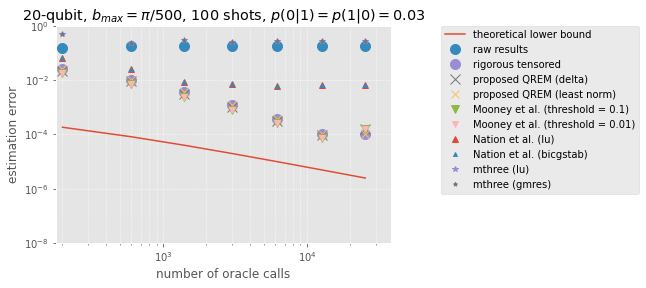

In [39]:
plt.clf()
plt.style.use('ggplot')
p_theoretical = plt.loglog( OracleCall_list, ErrorCramérRao_list, color='C0')
p_raw = plt.loglog( OracleCall_list, error_raw_list, 'o', color='C1', markersize=10)
p_ignis = plt.loglog( OracleCall_list, error_ignis_list, 'o', color='C2', markersize=10)
p_delta = plt.loglog( OracleCall_list, error_delta_list, 'x', color='C3', markersize=10)
p_lnp = plt.loglog( OracleCall_list, error_lnp_list, 'x', color='C4', markersize=8)
p_mooney01 = plt.loglog( OracleCall_list, error_mooney01_list, 'v', color='C5', markersize=8)
p_mooney001 = plt.loglog( OracleCall_list, error_mooney001_list, 'v', color='C6', markersize=6)
p_nation_lu = plt.loglog( OracleCall_list, error_nation_lu_list, '^', color='C7', markersize=6)
p_nation_bicgstab = plt.loglog( OracleCall_list, error_nation_bicgstab_list, '^', color='C8', markersize=4)
p_mthree_lu = plt.loglog( OracleCall_list, error_mthree_lu_list, '*', color='C9', markersize=6)
p_mthree_gmres = plt.loglog( OracleCall_list, error_mthree_gmres_list, '*', color='C10', markersize=4)


plt.title(r"20-qubit, $b_{max}=\pi/500$, 100 shots, $p(0|1)=p(1|0)=0.03$")
plt.xlim(OracleCall_list[0]*0.9, OracleCall_list[-1]*1.5)
plt.xlabel("number of oracle calls")
plt.ylim(0.00000001, 1)
plt.ylabel("estimation error")
plt.grid(True, which="both", ls="dotted")
plt.legend((p_theoretical[0], 
            p_raw[0], 
            p_ignis[0],
            p_delta[0], 
            p_lnp[0], 
            p_mooney01[0], 
            p_mooney001[0], 
            p_nation_lu[0], 
            p_nation_bicgstab[0], 
            p_mthree_lu[0], 
            p_mthree_gmres[0]), 
           ("theoretical lower bound", 
            "raw results", 
            "rigorous tensored",
            "proposed QREM (delta)",
            "proposed QREM (least norm)",
            "Mooney et al. (threshold = 0.1)",
            "Mooney et al. (threshold = 0.01)",
            "Nation et al. (lu)",
            "Nation et al. (bicgstab)",
            "mthree (lu)",
            "mthree (gmres)",
           ),
           bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0)

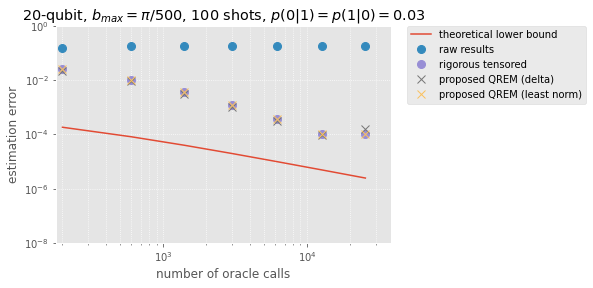

In [33]:
plt.clf()
plt.style.use('ggplot')
p_theoretical = plt.loglog( OracleCall_list, ErrorCramérRao_list, color='C0')
p_raw = plt.loglog( OracleCall_list, error_raw_list, 'o', color='C1', markersize=8)
p_ignis = plt.loglog( OracleCall_list, error_ignis_list, 'o', color='C2', markersize=8)
p_delta = plt.loglog( OracleCall_list, error_delta_list, 'x', color='C3', markersize=8)
p_lnp = plt.loglog( OracleCall_list, error_lnp_list, 'x', color='C4', markersize=8)
# p_mooney01 = plt.loglog( OracleCall_list, error_mooney01_list, 'v', color='C5', markersize=6)
# p_mooney001 = plt.loglog( OracleCall_list, error_mooney001_list, 'v', color='C6', markersize=6)
# p_nation_lu = plt.loglog( OracleCall_list, error_nation_lu_list, 'v', color='C7', markersize=6)
# p_nation_bicgstab = plt.loglog( OracleCall_list, error_nation_bicgstab_list, 'v', color='C8', markersize=6)
# p_mthree_lu = plt.loglog( OracleCall_list, error_mthree_lu_list, '*', color='C9', markersize=4)
# p_mthree_gmres = plt.loglog( OracleCall_list, error_mthree_gmres_list, '*', color='C10', markersize=4)


plt.title(r"20-qubit, $b_{max}=\pi/500$, 100 shots, $p(0|1)=p(1|0)=0.03$")
plt.xlim(OracleCall_list[0]*0.9, OracleCall_list[-1]*1.5)
plt.xlabel("number of oracle calls")
plt.ylim(0.00000001, 1)
plt.ylabel("estimation error")
plt.grid(True, which="both", ls="dotted")
plt.legend((p_theoretical[0], 
            p_raw[0], 
            p_ignis[0],
            p_delta[0], 
            p_lnp[0], 
            # p_mooney01[0], 
            # p_mooney001[0], 
            # p_nation_lu[0], 
            # p_nation_bicgstab[0], 
            # p_mthree_lu[0], 
            # p_mthree_gmres[0]
           ), 
           ("theoretical lower bound", 
            "raw results", 
            "rigorous tensored",
            "proposed QREM (delta)",
            "proposed QREM (least norm)",
            # "Mooney et al. (threshold = 0.1)",
            # "Mooney et al. (threshold = 0.01)",
            # "Nation et al. (lu)",
            # "Nation et al. (bicgstab)",
            # "mthree (lu)",
            # "mthree (gmres)",
           ),
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

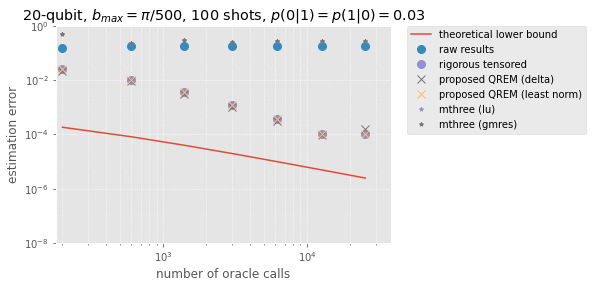

In [34]:
plt.clf()
plt.style.use('ggplot')
p_theoretical = plt.loglog( OracleCall_list, ErrorCramérRao_list, color='C0')
p_raw = plt.loglog( OracleCall_list, error_raw_list, 'o', color='C1', markersize=8)
p_ignis = plt.loglog( OracleCall_list, error_ignis_list, 'o', color='C2', markersize=8)
p_delta = plt.loglog( OracleCall_list, error_delta_list, 'x', color='C3', markersize=8)
p_lnp = plt.loglog( OracleCall_list, error_lnp_list, 'x', color='C4', markersize=8)
# p_mooney01 = plt.loglog( OracleCall_list, error_mooney01_list, 'v', color='C5', markersize=6)
# p_mooney001 = plt.loglog( OracleCall_list, error_mooney001_list, 'v', color='C6', markersize=6)
# p_nation_lu = plt.loglog( OracleCall_list, error_nation_lu_list, 'v', color='C7', markersize=6)
# p_nation_bicgstab = plt.loglog( OracleCall_list, error_nation_bicgstab_list, 'v', color='C8', markersize=6)
p_mthree_lu = plt.loglog( OracleCall_list, error_mthree_lu_list, '*', color='C9', markersize=4)
p_mthree_gmres = plt.loglog( OracleCall_list, error_mthree_gmres_list, '*', color='C10', markersize=4)


plt.title(r"20-qubit, $b_{max}=\pi/500$, 100 shots, $p(0|1)=p(1|0)=0.03$")
plt.xlim(OracleCall_list[0]*0.9, OracleCall_list[-1]*1.5)
plt.xlabel("number of oracle calls")
plt.ylim(0.00000001, 1)
plt.ylabel("estimation error")
plt.grid(True, which="both", ls="dotted")
plt.legend((p_theoretical[0], 
            p_raw[0], 
            p_ignis[0],
            p_delta[0], 
            p_lnp[0], 
            # p_mooney01[0], 
            # p_mooney001[0], 
            # p_nation_lu[0], 
            # p_nation_bicgstab[0], 
            p_mthree_lu[0], 
            p_mthree_gmres[0]
           ), 
           ("theoretical lower bound", 
            "raw results", 
            "rigorous tensored",
            "proposed QREM (delta)",
            "proposed QREM (least norm)",
            # "Mooney et al. (threshold = 0.1)",
            # "Mooney et al. (threshold = 0.01)",
            # "Nation et al. (lu)",
            # "Nation et al. (bicgstab)",
            "mthree (lu)",
            "mthree (gmres)",
           ),
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

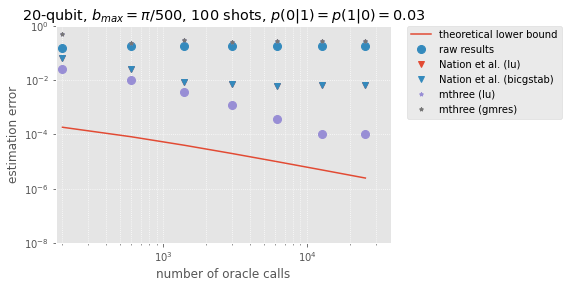

In [35]:
plt.clf()
plt.style.use('ggplot')
p_theoretical = plt.loglog( OracleCall_list, ErrorCramérRao_list, color='C0')
p_raw = plt.loglog( OracleCall_list, error_raw_list, 'o', color='C1', markersize=8)
p_ignis = plt.loglog( OracleCall_list, error_ignis_list, 'o', color='C2', markersize=8)
# p_delta = plt.loglog( OracleCall_list, error_delta_list, 'x', color='C3', markersize=8)
# p_lnp = plt.loglog( OracleCall_list, error_lnp_list, 'x', color='C4', markersize=8)
# p_mooney01 = plt.loglog( OracleCall_list, error_mooney01_list, 'v', color='C5', markersize=6)
# p_mooney001 = plt.loglog( OracleCall_list, error_mooney001_list, 'v', color='C6', markersize=6)
p_nation_lu = plt.loglog( OracleCall_list, error_nation_lu_list, 'v', color='C7', markersize=6)
p_nation_bicgstab = plt.loglog( OracleCall_list, error_nation_bicgstab_list, 'v', color='C8', markersize=6)
p_mthree_lu = plt.loglog( OracleCall_list, error_mthree_lu_list, '*', color='C9', markersize=4)
p_mthree_gmres = plt.loglog( OracleCall_list, error_mthree_gmres_list, '*', color='C10', markersize=4)


plt.title(r"20-qubit, $b_{max}=\pi/500$, 100 shots, $p(0|1)=p(1|0)=0.03$")
plt.xlim(OracleCall_list[0]*0.9, OracleCall_list[-1]*1.5)
plt.xlabel("number of oracle calls")
plt.ylim(0.00000001, 1)
plt.ylabel("estimation error")
plt.grid(True, which="both", ls="dotted")
plt.legend((p_theoretical[0], 
            p_raw[0], 
            # p_ignis[0],
            # p_delta[0], 
            # p_lnp[0], 
            # p_mooney01[0], 
            # p_mooney001[0], 
            p_nation_lu[0], 
            p_nation_bicgstab[0], 
            p_mthree_lu[0], 
            p_mthree_gmres[0]
           ), 
           ("theoretical lower bound", 
            "raw results", 
            # "rigorous tensored",
            # "proposed QREM (delta)",
            # "proposed QREM (least norm)",
            # "Mooney et al. (threshold = 0.1)",
            # "Mooney et al. (threshold = 0.01)",
            "Nation et al. (lu)",
            "Nation et al. (bicgstab)",
            "mthree (lu)",
            "mthree (gmres)",
           ),
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)